#**Movie Data analysis**



##introduction
in this project we will try to find the best aspects for the successful films and what we can do if we want to make a  successful film

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling
### General Properties
at first we'll read csv file then we here will try to find
1. first 5 rows (to know what the data are talkig about and find outliers)
2. last 5 rows (to know what the data are talkig about and find outliers)
3. shape of DF (how many rows and columns)
4. general mathematics on numerical rows


In [ ]:
df = pd.read_csv("tmdb-movies.csv") #read movie.csv

In [102]:
df.shape #find shape of data frame

(10866, 21)

In [103]:
df.info()
#find info of data frame
# There are a lot on Nans in columns especially homepage
# Type of "Date" column is object we have to make it datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [104]:
df.describe()
#find describe Of quantitive columns
#outliers like min of revenue_adj and budget_adj is zero

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [105]:
df.head(5) #get first five rows in data frame

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [106]:
df.tail(5) #find last five rows in data frame

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0



## Data Cleaning
Our problems are
1.   **Nans** in our project
2.   **Duplicates** in our project
3.   Unuseful columns
4.   There are **outliers**
5.   **Incorrect type** of  date release columns
6. wrong data


In [107]:
df["release_date"] = pd.to_datetime(df["release_date"]) #change type of date release column

In [108]:
df["months"] = df["release_date"].dt.month # make new column of month
df["year"] = df["release_date"].dt.year # make new column of year

In [109]:
df["year"].astype("int64").dtype #change type of year column into int64
df['revenue_adj'] = df['revenue_adj'].astype('int64') #change type of revenue_adj column into int64
df['budget_adj'] = df['budget_adj'].astype('int64') #change type of budget_adj column into int64

In [110]:
df.isnull().sum().sum() # number of Nans in our project
df.duplicated().sum() # number of duplicates

1

In [111]:
df.drop(["homepage" , "imdb_id" , "id" , "tagline"] ,axis = 1, inplace = True)
 # we delete some columns because they many Nans or won't help us in analysing

In [112]:
df.dropna(inplace = True) # delete Nans
df.drop_duplicates(inplace = True) # delete duplicates

### Trying to find outliers

In [113]:
def plot_column (column , type_of_Plot):
  df[column].plot(kind = type_of_Plot) #function to plot specific column

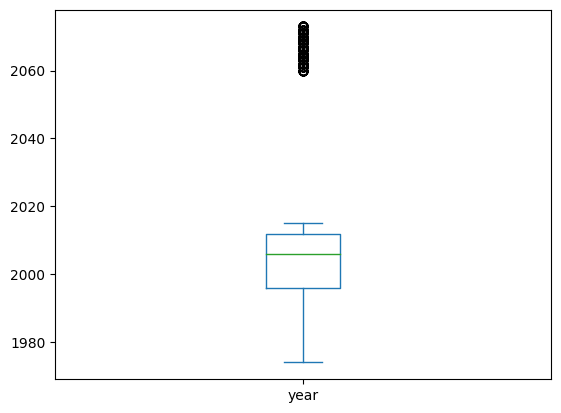

In [114]:
plot_column("year","box") #problem in year there are some years like 2064

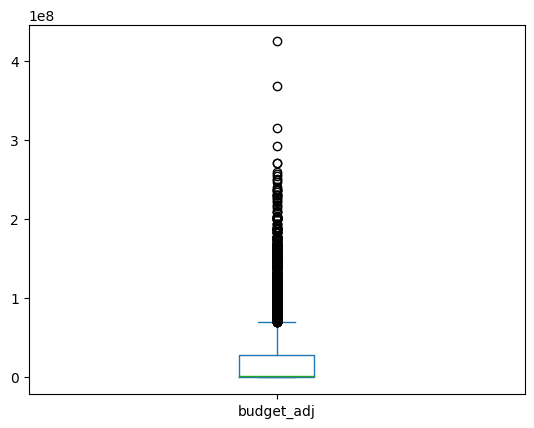

In [115]:
plot_column("budget_adj","box") # there are outliers but they aren't harmful we need them

<Axes: >

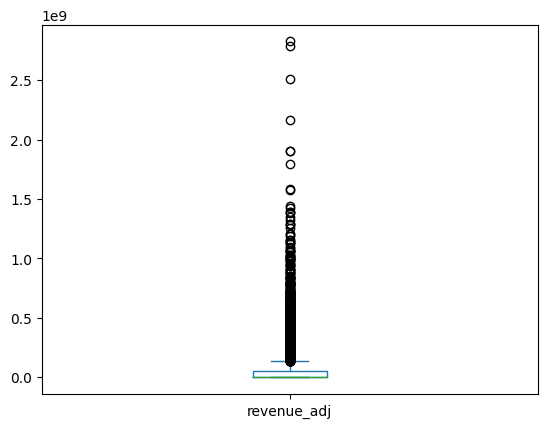

In [116]:
df["revenue_adj"].plot(kind = "box") # there are outliers but they aren't harmful we need them

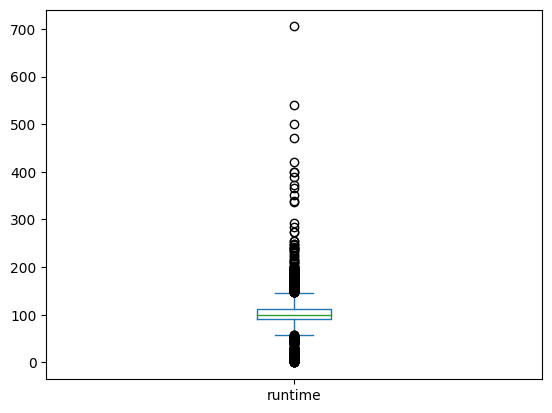

In [117]:
plot_column("runtime","box") # the problem is that there is runtime = 0 there are other outliers but we need them

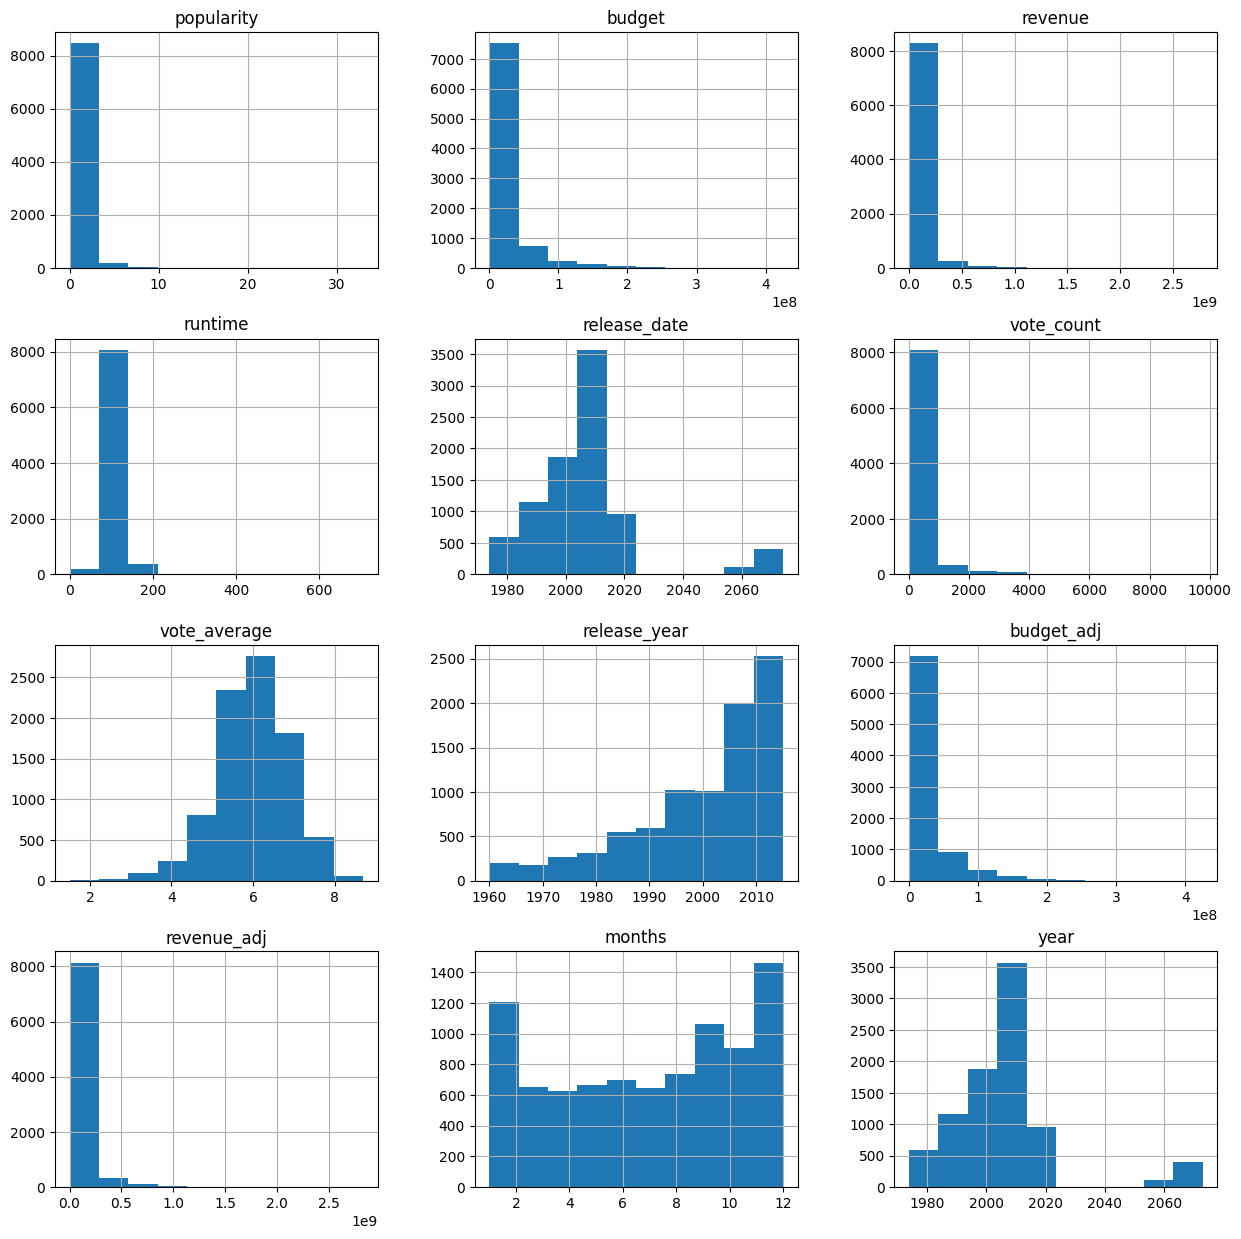

In [118]:
df.hist(figsize = (15,15));
# to get outliers easily as box plot doesn't really help me

In [119]:
df = df[(df['budget_adj'] >= 0 )& (df["year"]<=2024)& (df["runtime"]>10) & (df["revenue_adj"] >0) ]

# we delete cells whose budget or revenue which is zero and the years which is after 2024  and runtime less than 10 minutes

<a id='eda'></a>
## Exploratory Data Analysis



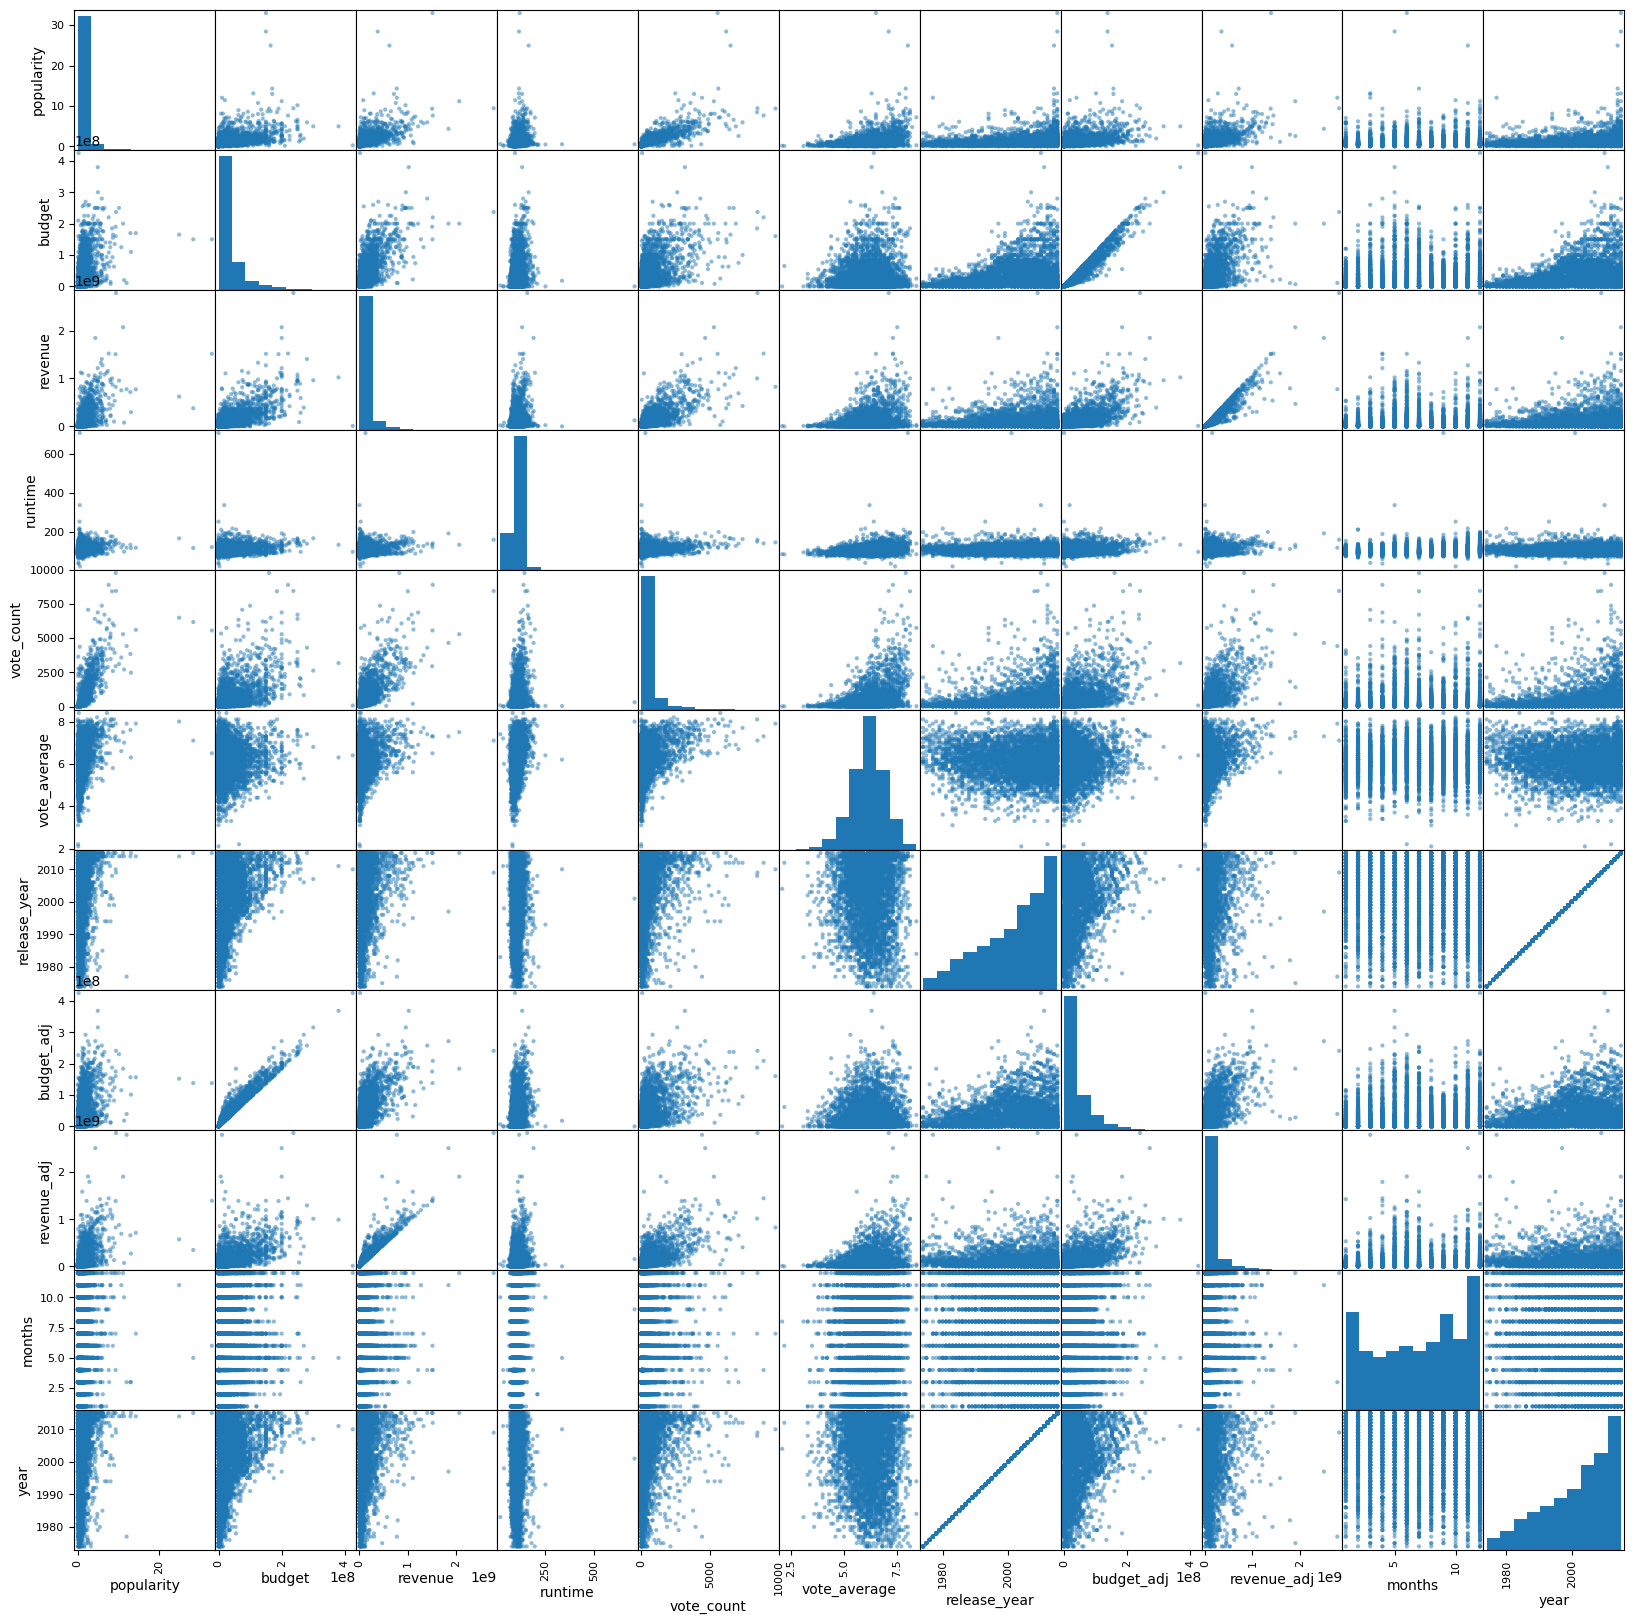

In [131]:
pd.plotting.scatter_matrix(df , figsize=(20,20));  #to show relation between different numerical columns

### Question 1
### The staff who worked on most films since 2000

In [132]:
df_since2000 = df[df["year"]>2000] #making new data frame which has films were released last 10 years

In [133]:
def show_counts(column ,type_plot ,size = (6,6)):
  """
  get the unique elements and their repeatation number then it arrange it descendingly and plot first 5
  """
  df_since2000[column].value_counts().sort_values(ascending = False).head(5).plot(kind = type_plot , figsize = size)


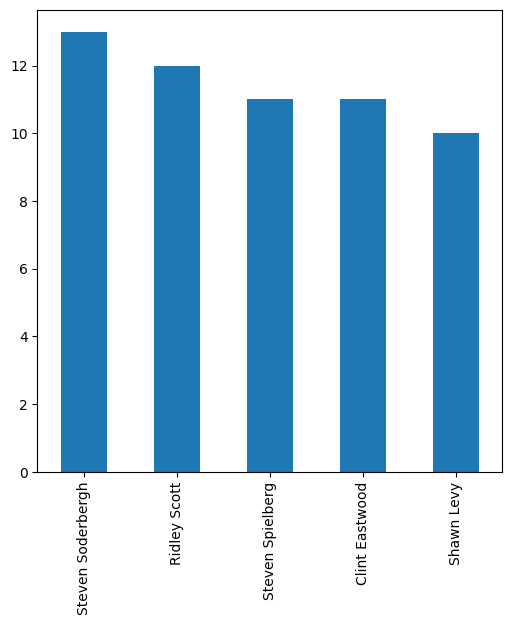

In [134]:
show_counts("director" , "bar") #The directors who worked on most films since 2000


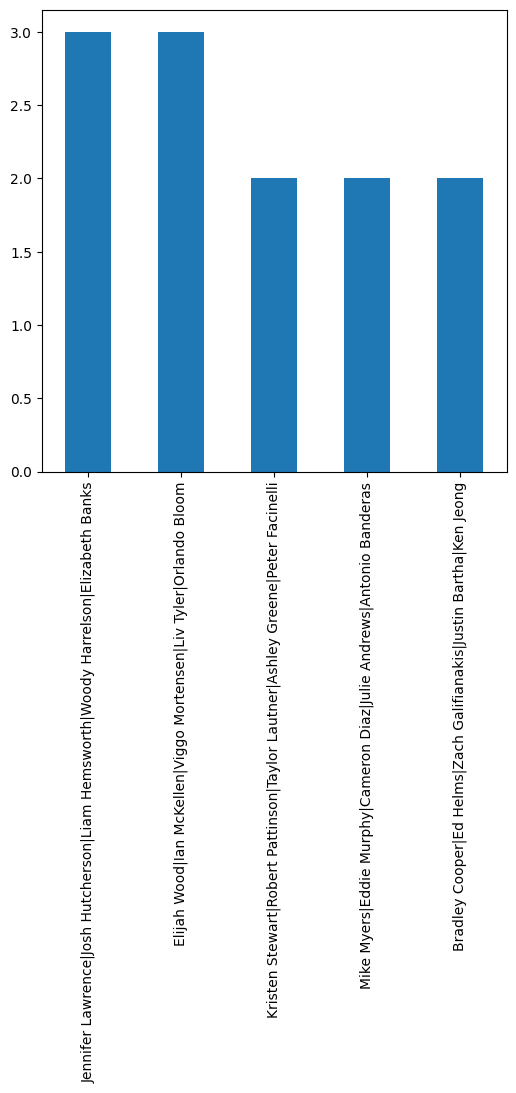

In [135]:
show_counts("cast" , "bar") #The casts who worked on most films since 2000

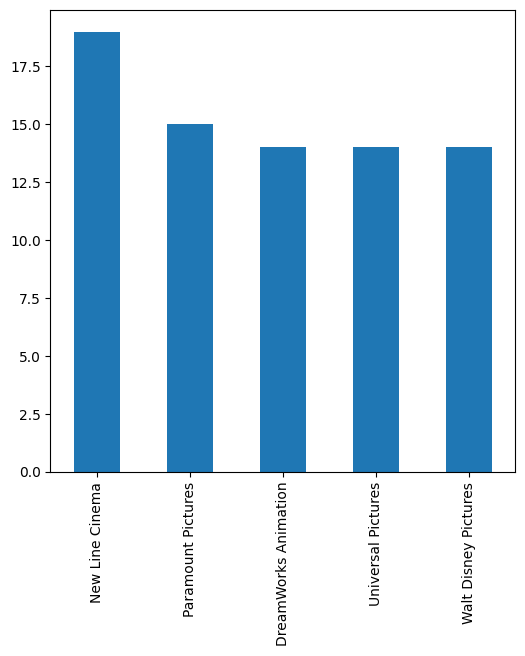

In [136]:
show_counts("production_companies" , "bar") #The companies who worked on most films since 2000

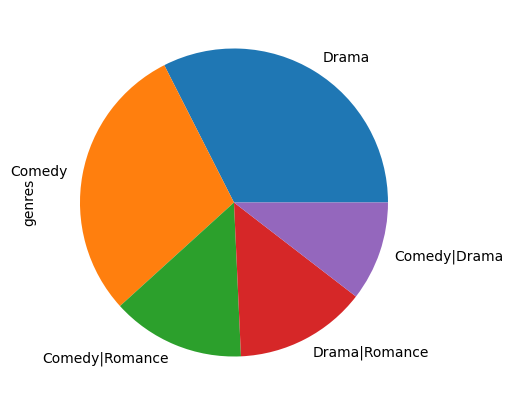

In [137]:
show_counts("genres" , "pie" , (5,5)) #genres which were used on most films since 2000

###Question 2
#staff who worked on the most successful films since 2000


In [138]:
def best10_in_revenue (column , n = 5 , type_plot = "bar"):
  """
  get first n (variable that carry number) in the cloumn I need from data frame arranged according to revenue
  """
  # arrange the new data frame according to revenue column and get first n from dataframe
  df_since2000.nlargest(n, 'revenue_adj').plot(x = column , y =["revenue_adj"],kind = type_plot)



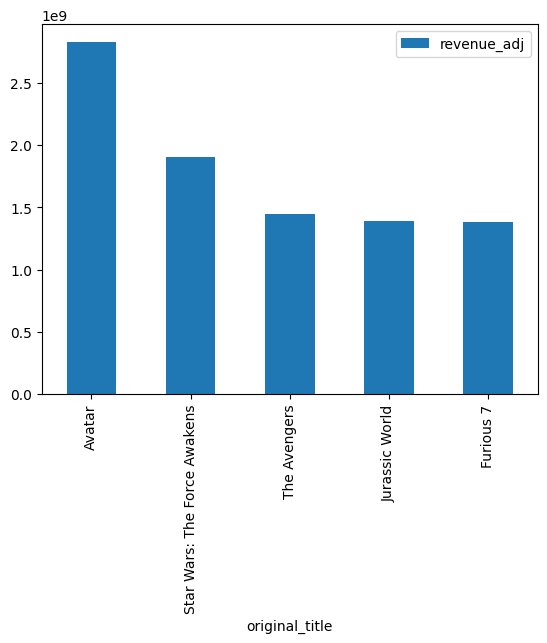

In [139]:
best10_in_revenue("original_title" , 5) #best films in revenue

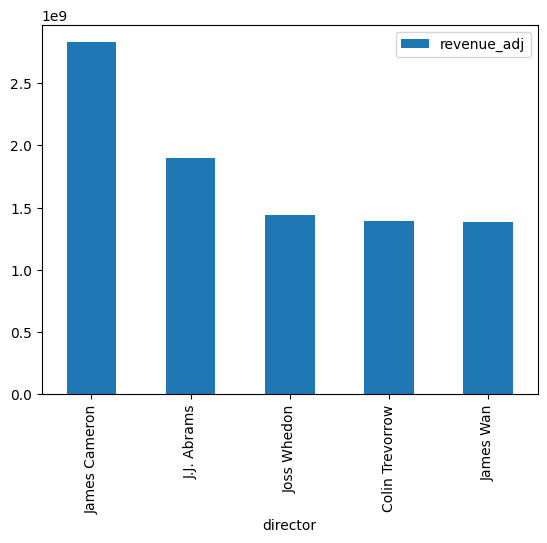

In [140]:
 # Cast worked in most successful films since 2000
best10_in_revenue("director" , 5)

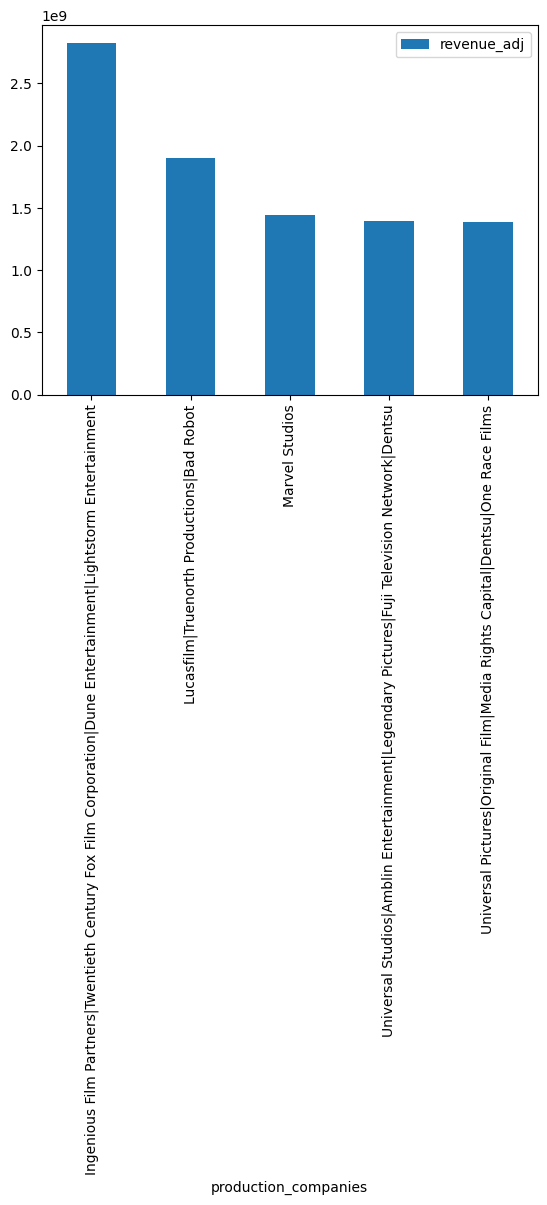

In [141]:
best10_in_revenue("production_companies" , 5) # companies worked in most successful films since 2000

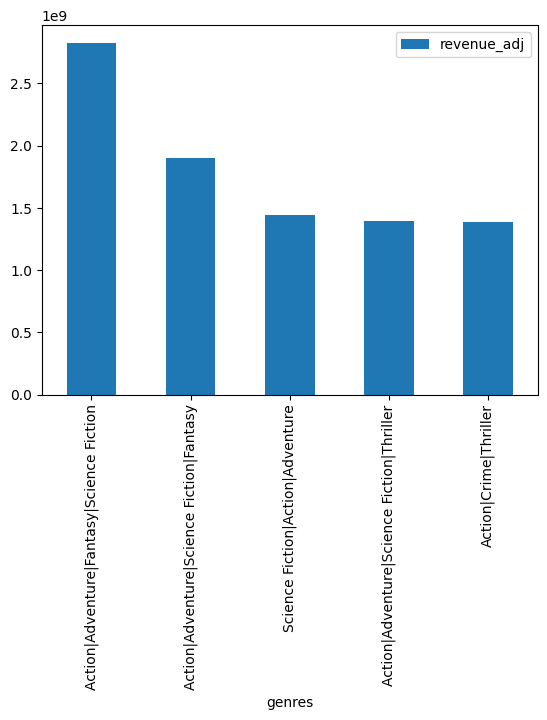

In [142]:
best10_in_revenue("genres") #genres that were used in most successful films since 2000

###Question 3
###How does the time affect films
we want to know
1. what is the future of market of making films
2. the best month to release film


<Axes: xlabel='months'>

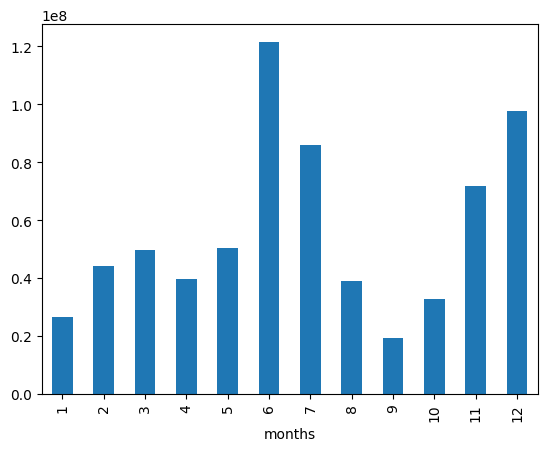

In [143]:
#best month to upload movie
df.groupby(["months"])["revenue_adj"].median().plot(kind ="bar" )

<Axes: xlabel='year'>

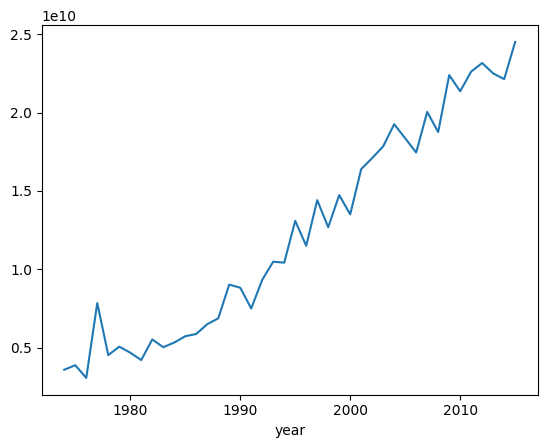

In [144]:
df.groupby(["year"])["revenue_adj"].sum().plot() #increasing market of making films as revenue increses

<Axes: xlabel='year,months'>

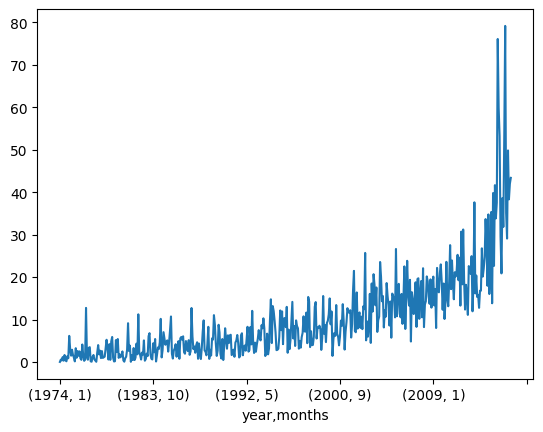

In [145]:
df.groupby(["year" , "months" ])["popularity"].sum().plot() #increasing market of making films as popularity increses

### Question 4
###  What kinds of properties are associated with movies that have high revenues?
we to find different relations between different columns

In [146]:
def relation (x_axis , y_axis , type_plot):
  """
  take 2 columns and plot it by given type
  """
  df.plot(x = x_axis, y = y_axis , kind = type_plot)

**plot budget_adj and revenue_adj by scatter**


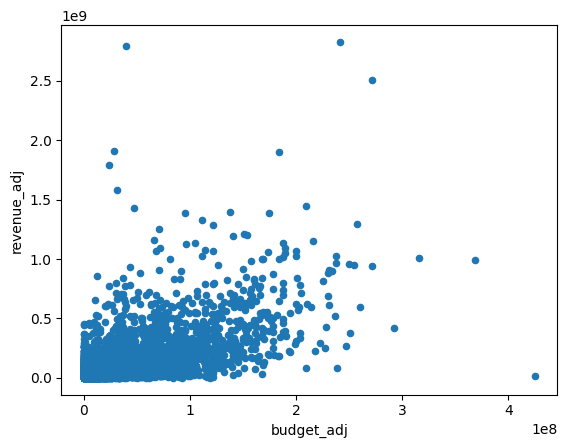

In [147]:
relation( "budget_adj", "revenue_adj" , "scatter") #by increasing budget revenue increasees

**plot runtime and revenue_adj by scatter**


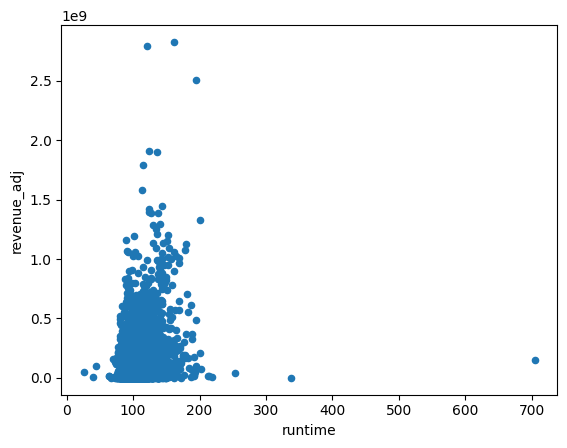

In [148]:
relation( "runtime", "revenue_adj" ,  "scatter")#by increasing runtime revenue increasees until specific point

**plot vote_average and revenue_adj by scatter**

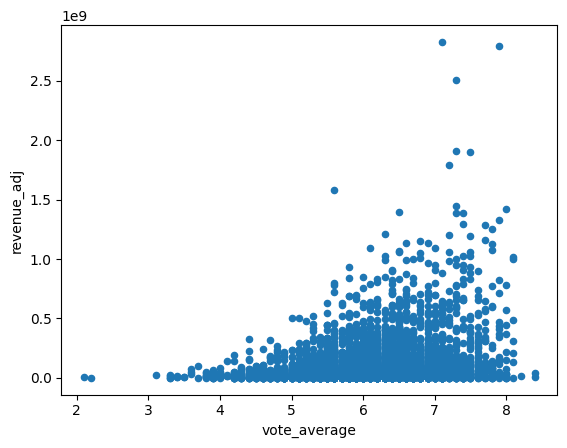

In [149]:
relation("vote_average", "revenue_adj" , "scatter")#by increasing vote average revenue increase

**plot budget_adj and vote_average by scatter**

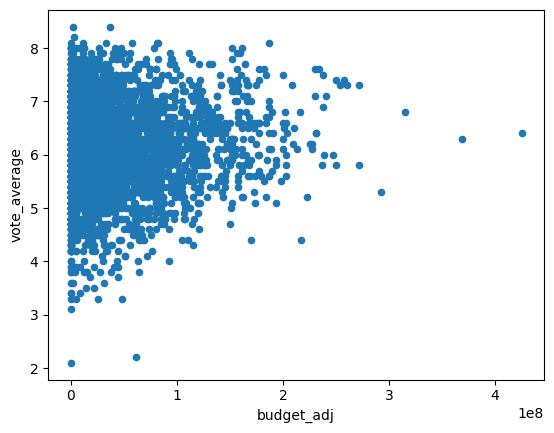

In [150]:
relation("budget_adj", "vote_average" , "scatter") #by increasing budget vote average increasees

**plot budget_adj and popularity by scatter**

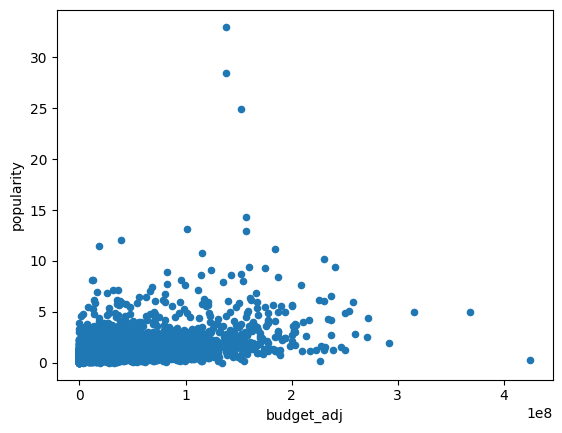

In [151]:
relation("budget_adj", "popularity" , "scatter") #by increasing budget popularity increasees

**plot vote_average and popularity by scatter**

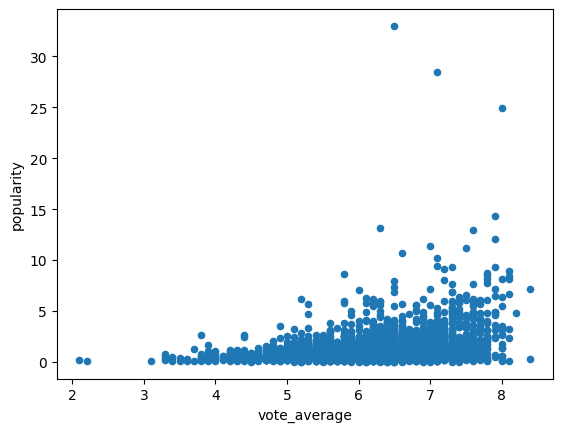

In [152]:
relation("vote_average", "popularity" , "scatter") #by increasing vote average popularity increase

## Conclusions

<a id='conclusions'></a>
To conclude if you want to make film
you have to choose best time which is june (6)
you have to choose staff who worked in the best films in revenue
or who worke most in films so you have many choices are up to you
and you have many factors for making films which are

    by increasing budget revenue increasees
    by increasing runtime revenue increasees until specific point
    by increasing budget vote average increasees
    by increasing vote average revenue increase
    by increasing vote average popularity increase
    by increasing vote average popularity increase
